## Parsing and Analyzing MTurk Data

This code block demonstrates the process of parsing and analyzing MTurk data using pandas. Here's a breakdown of the steps:

1. Load the data from the 'mturk_data.csv' file into a pandas DataFrame.
2. Define a function `parse_response` to extract the necessary information from the data and create a proper data structure.
3. Add a new 'summary' column to the DataFrame.
4. Iterate over each row of the DataFrame, parse the response data, and populate the 'summary' column along with additional columns.
5. Define a function `locate_paste` to determine if the key strokes signify text copying.
6. Create a new column 'copied' based on the key strokes using the `locate_paste` function.
7. Print the total number of rows in the DataFrame.
8. Identify duplicate rows based on the 'summary' column.
9. Select specific rows by index and desired columns.
10. Drop rows from the DataFrame based on specified indices.


In [118]:
import pandas as pd

# Set the option to display the full content of 'summary' column
pd.set_option('display.max_colwidth', -1)

# Load the data from 'mturk_data.csv'
df = pd.read_csv('mturk_data.csv')

def parse_response(x):
    """
    Create proper data structure for further analysis
    """
    summary = x['summary']  # Extract the 'summary' value from the input
    actions = eval(x['log_of_what_they_did'])
    
    data = {'keys': '', 'dates': []}
    
    for val in actions:
        if (val[0] == 'copy') or (val[0] == 'paste'):
            data['keys'] += ' ' + val[0]
            data['dates'].append(None)
        else:
            data['keys'] += ' ' + val[1]
            data['dates'].append(val[2])
    data['keys'] = ' '.join(data['keys'].split()).strip()
    
    return summary, data

# Add 'summary' column to the DataFrame
df['summary'] = ''

# Parse the response data and populate the columns
for i, row in df.iterrows():
    unparsed = eval(row['Answer.taskAnswers'])[0]
    summary, data = parse_response(unparsed)
    
    df.loc[i, 'summary'] = summary  # Assign the 'summary' value
    df.loc[i, 'key_strokes'] = data['keys']
    df.loc[i, 'datetime'] = str([str(date) for date in data['dates']])

def locate_paste(x: str) -> bool:
    """
    This function will attempt to use some heuristics to determine
    if the key strokes signify that the text was copied.
    """
    if ('Control v' in x) or ('paste' in x):
        return True
    else:
        return False

# Create a new column 'copied' based on the key strokes
df['copied'] = df['key_strokes'].apply(lambda x: locate_paste(x))

# Print the total number of rows in the DataFrame
num_rows = len(df)
print(f"Total number of rows: {num_rows}")

# Identify duplicate rows based on the 'summary' column
duplicate_row_indices = df[df['summary'].duplicated(keep=False)].index
print(f"The duplicate rows are: {duplicate_row_indices}")

# Select specific rows by index and desired columns
rows = [13, 14, 19, 36]
selected_rows = df.loc[rows, ['summary', 'WorkTimeInSeconds']]
print(f"Selected rows:\n{selected_rows}")

# Drop rows based on indices
rows_to_exclude = [14, 36]
df = df.drop(rows_to_exclude)


Total number of rows: 48
The duplicate rows are: Int64Index([13, 14, 19, 36], dtype='int64')
Selected rows:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 summary  \
13  The mean duration of treatment was 3.4 years. The mean weight loss during the lead-in period was 2.6 kg; after randomization, the subjects in the sibutramine group achieved and maintained further weight reduction (mean, 1.7 kg). The mean blood pressure decreased in both groups, with greater reductio

/var/folders/7z/xs72fgxd3ygc3g7r3497scm80000gn/T/ipykernel_65987/381962866.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Conversion and Analysis of Work Time

Let's figure out how many tasks were completed in the "conservative" estimate from the authors. This code block demonstrates the conversion of work time from seconds to minutes and performs an analysis based on the converted values. Here's an overview of the steps:

1. Convert the 'WorkTimeInSeconds' column to minutes by dividing it by 60 and create a new column called 'WorkTimeInMinutes'.
2. Calculate the number of work times that are less than or equal to 4 minutes using the condition `df['WorkTimeInMinutes'] <= 4`.
3. Print the count of work times less than or equal to 4 minutes.


In [133]:
# Convert WorkTimeInSeconds to minutes
df['WorkTimeInMinutes'] = df['WorkTimeInSeconds'] / 60

# Calculate the number of work times that are less than or equal to 4 minutes
num_worktimes_less_than_4_minutes = df[df['WorkTimeInMinutes'] <= 4].shape[0]

print(f"Number of work times less than or equal to 4 minutes: {num_worktimes_less_than_4_minutes}")


Number of work times less than or equal to 4 minutes: 5


## Visualization of Work Time Distribution

This code block showcases the creation of a histogram to visualize the distribution of work times. Here's a breakdown of the steps involved:

1. Set the aesthetic style of the plots using the `seaborn` library.
2. Create an array of bins representing the range of work times, with a step of 1 minute and adjusted to align the bins.
3. Plot a histogram using `sns.histplot`, specifying the data (`df['WorkTimeInMinutes']`), bins, color, linewidth, and edgecolor.
4. Set major and minor tick locators on the x-axis to control the positioning of the labels and minor ticks.
5. Remove the 0.5 markers on the y-axis to enhance readability.
6. Calculate the mean, median, and mode of work times based on the provided data.
7. Add vertical lines representing the mean, median, and mode values to the plot.
8. Include a legend indicating the respective lines' meanings.
9. Set the labels for the x-axis, y-axis, and title of the plot.
10. Display the plot using `plt.show()`.

This visualization allows for a clear understanding of the distribution of work times, with the mean, median, and mode values highlighted. It helps identify any trends or patterns in the data and provides insights into the typical duration of tasks.

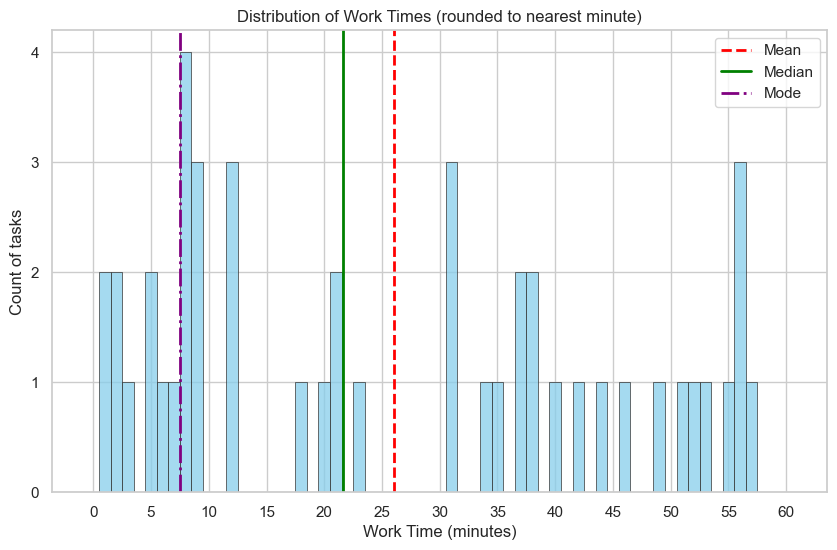

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Set the aesthetic style of the plots
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Create an array of bins from 0 to max_work_time + 5 minutes with a step of 1 minute
max_work_time = df['WorkTimeInMinutes'].max()
bins = np.arange(0, max_work_time + 5, 1) - 0.5  # Subtract 0.5 to align bins

# Plot histogram with these bins
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['WorkTimeInMinutes'], bins=bins, kde=False, color="skyblue", linewidth=0.5, edgecolor=".2", ax=ax)

# Set x-axis labels every 5 minutes
ax.xaxis.set_major_locator(MultipleLocator(5))

# Add minor ticks on the x-axis for every minute
ax.xaxis.set_minor_locator(MultipleLocator(1))

# Remove 0.5 markers on the y-axis
ax.yaxis.set_major_locator(MultipleLocator(1))

# Calculate the mean, median, and mode of work times
mean_work_time = df['WorkTimeInMinutes'].mean()
median_work_time = df['WorkTimeInMinutes'].median()
mode_work_time = bins[np.argmax([patch.get_height() for patch in ax.patches])]

# Add vertical lines for the mean, median, and mode
ax.axvline(mean_work_time, color='red', linestyle='--', linewidth=2)
ax.axvline(median_work_time, color='green', linestyle='-', linewidth=2)
ax.axvline(mode_work_time, color='purple', linestyle='-.', linewidth=2)

# Add a legend
ax.legend(['Mean', 'Median', 'Mode'])

plt.xlabel('Work Time (minutes)')
plt.ylabel('Count of tasks')
plt.title('Distribution of Work Times (rounded to nearest minute)')
plt.show()


## Distribution of Total Tasks Completed per Person

This code block demonstrates the creation of a histogram to visualize the distribution of total tasks completed per person. Note that `LifetimeApprovalRate` is the approval rate for previous tasks from the given requestor, not the Turker's approval rate for _all_ tasks. Here's an overview of the steps involved:

1. Import the necessary libraries: `re` for regular expression matching, `numpy` for array manipulation, `seaborn` for data visualization, and `matplotlib.pyplot` for plotting.
2. Define a function, `extract_total_tasks`, to extract the total number of tasks from a string using regular expressions.
3. Apply the `extract_total_tasks` function to the 'LifetimeApprovalRate' column in the DataFrame, creating a new column named 'TotalTasks'.
4. Group the DataFrame by 'WorkerId' and calculate the mean number of tasks for each person, resulting in a Series called `tasks_per_person`.
5. Create an array of bins from 0 to `max_tasks + 2`, with a step of 1 and adjusted to align the bins.
6. Plot the distribution of total tasks completed per person using `sns.histplot`. Specify the data (`tasks_per_person`), bins, color, linewidth, and edgecolor.
7. Set the x-axis tick labels to display the range of tasks from 1 to `max_tasks`.
8. Set the x-axis label to 'Number of Tasks Completed', the y-axis label to 'Count', and the title to 'Distribution of Total Tasks Completed per Person prior to Assignment'.
9. Display the histogram using `plt.show()`.
10. Lastly, the `len(df)` statement is not related to the plot and seems to return the number of rows in the DataFrame.

This histogram provides insights into the distribution of total tasks completed per person, helping analyze the workload and task completion patterns.


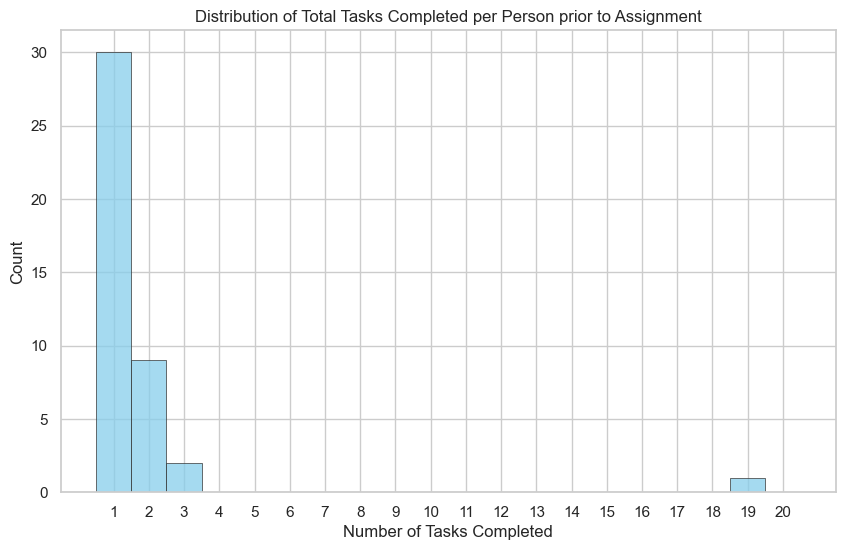

46

In [106]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to extract the total number of tasks from a string
def extract_total_tasks(s):
    match = re.search(r'\((\d+)/(\d+)\)', s)
    if match:
        return int(match.group(2))
    else:
        return None

# Apply the function to the 'LifetimeApprovalRate' column
df['TotalTasks'] = df['LifetimeApprovalRate'].apply(extract_total_tasks)

# Group by 'WorkerId' and count the number of tasks for each person
tasks_per_person = df.groupby('WorkerId')['TotalTasks'].mean()

# Create an array of bins from 0 to max_tasks + 2
max_tasks = 20
bins = np.arange(1, max_tasks + 2) - 0.5

# Plot the number of tasks per person
plt.figure(figsize=(10, 6))
sns.histplot(tasks_per_person, bins=bins, color='skyblue', kde=False, linewidth=0.5, edgecolor='.2')
plt.xticks(range(1, max_tasks + 1))
plt.xlabel('Number of Tasks Completed')
plt.ylabel('Count')
plt.title('Distribution of Total Tasks Completed per Person prior to Assignment')
plt.show()
len(df)


## Average Work Time for User with 19 Tasks

Let's see how long the most experienced Turker (for this requestor) took to complete the task.

This code block filters the DataFrame to select only the rows corresponding to the user who completed 19 tasks. It then calculates the average work time for this user and displays it as the output.

Here's an overview of the steps involved:

1. Filter the DataFrame to select rows where the 'TotalTasks' column is equal to 19, creating a new DataFrame named `user_19_tasks`.
2. Compute the average work time for the selected user by accessing the 'WorkTimeInSeconds' column of the `user_19_tasks` DataFrame. The work time is initially in seconds, so it is divided by 60 to convert it to minutes.
3. Display the average work time for the user with 19 tasks using formatted string output, rounded to two decimal places and followed by the unit 'minutes'.

You can use this code to calculate and analyze the average work time for a specific user with 19 tasks.


In [102]:
# Filter rows for the user with 19 tasks
user_19_tasks = df[df['TotalTasks'] == 19]

# Compute the average work time in minutes
work_time_minutes = user_19_tasks['WorkTimeInSeconds'].mean() / 60

print(f"Average work time for the user with 19 tasks: {work_time_minutes:.2f} minutes")


Average work time for the user with 19 tasks: 31.25 minutes
